<a href="https://colab.research.google.com/github/Malbasahi/CodeClauseInternship_Gold_Price_Prediction/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

In [199]:
# Load the dataset from your local file (update the file path)
file_path = "/content/BSE-BOM590111.csv"
data = pd.read_csv(file_path)

In [200]:
# Check the data
data.head()

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
0,2017-02-06,0.79,0.79,0.76,0.76,0.79,7430.0,7.0,5848.0,7430.0,100.0,0.03,-0.03
1,2017-02-03,0.79,0.79,0.79,0.79,0.79,310.0,4.0,244.0,310.0,100.0,0.00,0.00
2,2017-02-02,0.83,0.83,0.83,0.83,0.83,75.0,1.0,62.0,75.0,100.0,0.00,0.00
3,2017-01-31,0.87,0.87,0.87,0.87,0.87,1050.0,2.0,913.0,1050.0,100.0,0.00,0.00
4,2017-01-25,0.91,0.91,0.91,0.91,0.91,400.0,1.0,364.0,400.0,100.0,0.00,0.00


In [201]:
# Select the specified features
selected_features = [
    'Open', 'High', 'Low', 'Close', 'WAP',
    'No. of Shares', 'No. of Trades', 'Total Turnover',
    'Deliverable Quantity'
]

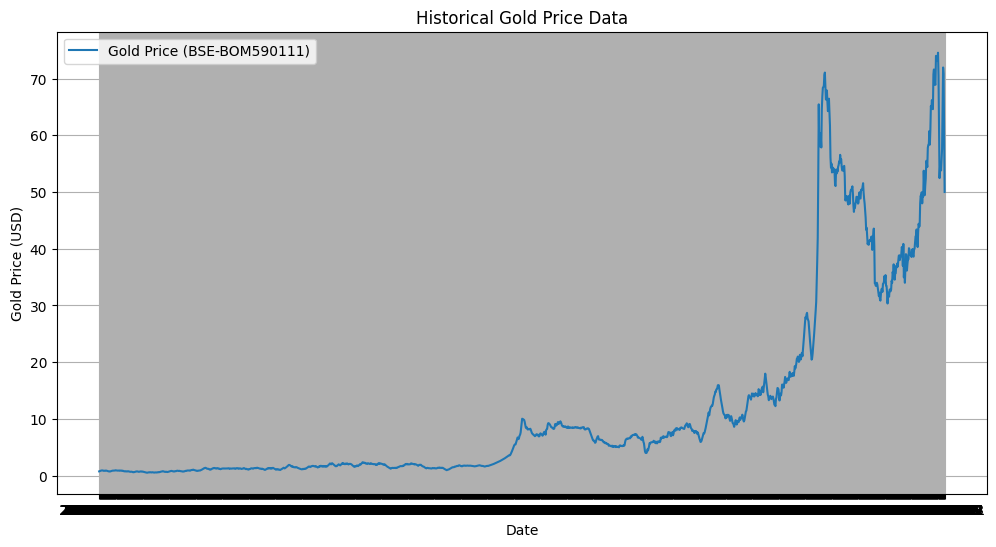

In [148]:
# Visualize historical gold prices
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Gold Price (BSE-BOM590111)')
plt.xlabel('Date')
plt.ylabel('Gold Price (USD)')
plt.title('Historical Gold Price Data')
plt.legend()
plt.grid(True)
plt.show()

In [202]:
# Split the data into training and testing sets
X = data[selected_features]
y = data['Close']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [203]:
# Scale the input features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [204]:
# Perform feature selection using F-test (ANOVA)
k_best = SelectKBest(score_func=f_regression, k='all')
X_train_selected = k_best.fit_transform(X_train, y_train)
X_test_selected = k_best.transform(X_test)

In [205]:
# Get the indices of the selected features
selected_indices = k_best.get_support(indices=True)

# Print the names of the selected features
selected_feature_names = [selected_features[i] for i in selected_indices]
print(f'Selected Features: {selected_feature_names}')

Selected Features: ['Open', 'High', 'Low', 'Close', 'WAP', 'No. of Shares', 'No. of Trades', 'Total Turnover', 'Deliverable Quantity']


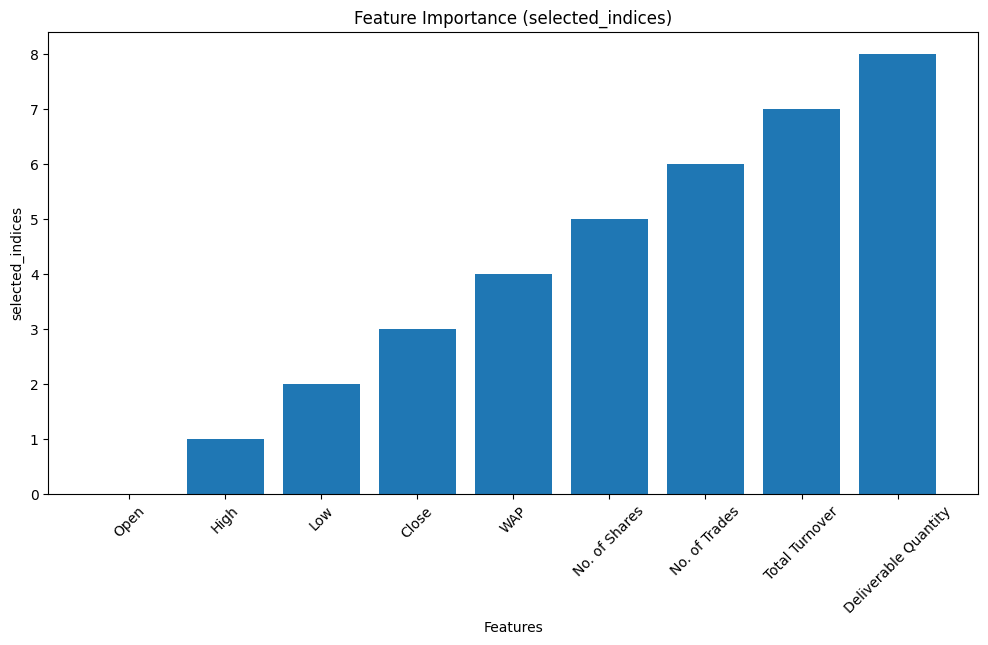

In [187]:
# Create a bar chart to visualize feature importance (F-scores)
plt.figure(figsize=(12, 6))
plt.bar(selected_feature_names, selected_indices)
plt.xlabel('Features')
plt.ylabel('selected_indices')
plt.title('Feature Importance (selected_indices)')
plt.xticks(rotation=45)
plt.show()

In [206]:
# Define a range of alpha values to test for Ridge and Lasso
alphas = [0.1, 1.0, 10.0, 100.0]  # Experiment with different alpha values

In [213]:
# Create a list of regression models to compare
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso()),
    ("SVR", SVR(kernel='linear', C=1.0)),
    ("Random Forest Regression", RandomForestRegressor(n_estimators=100, random_state=42))
]

In [214]:
# Initialize variables to store the best model and its performance
best_model_name = None
best_mse = float('inf')  # Initialize with a high value
best_r2 = -float('inf')  # Initialize with a low value

In [215]:
# Initialize lists to store model results
model_names = []
mse_scores = []
r2_scores = []

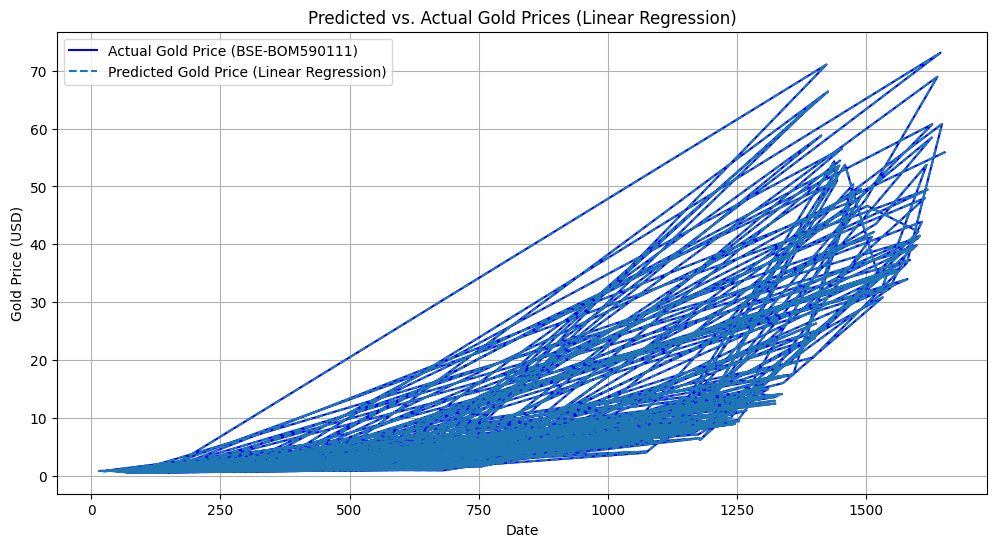

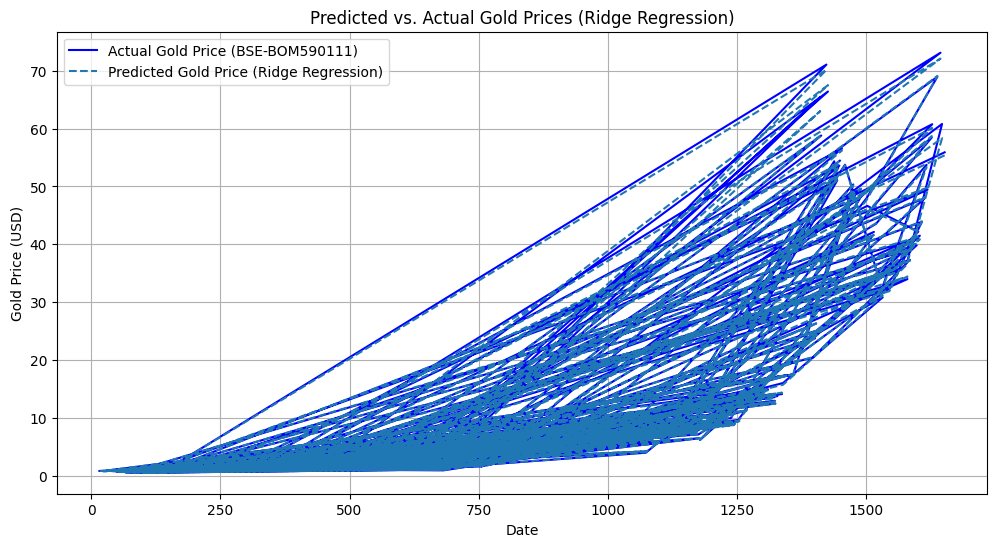

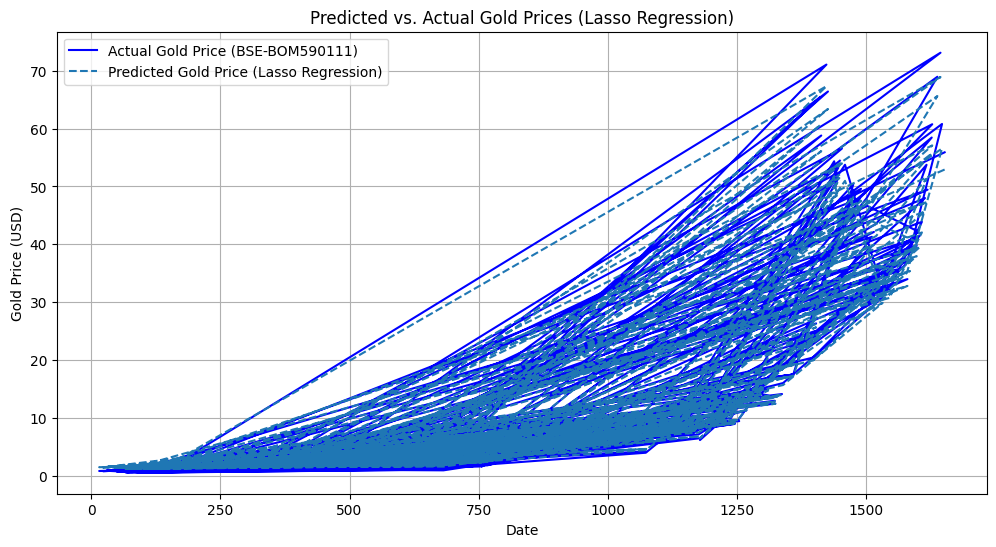

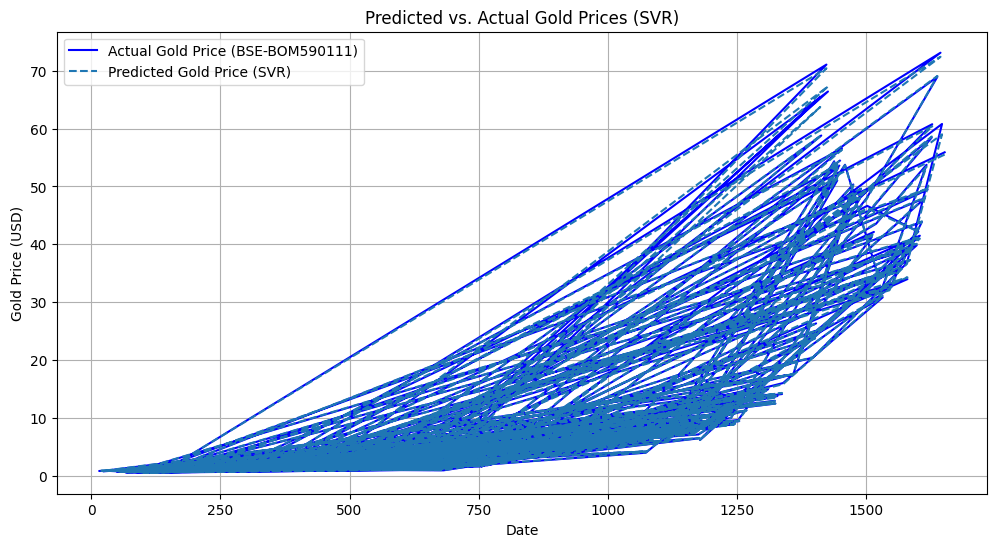

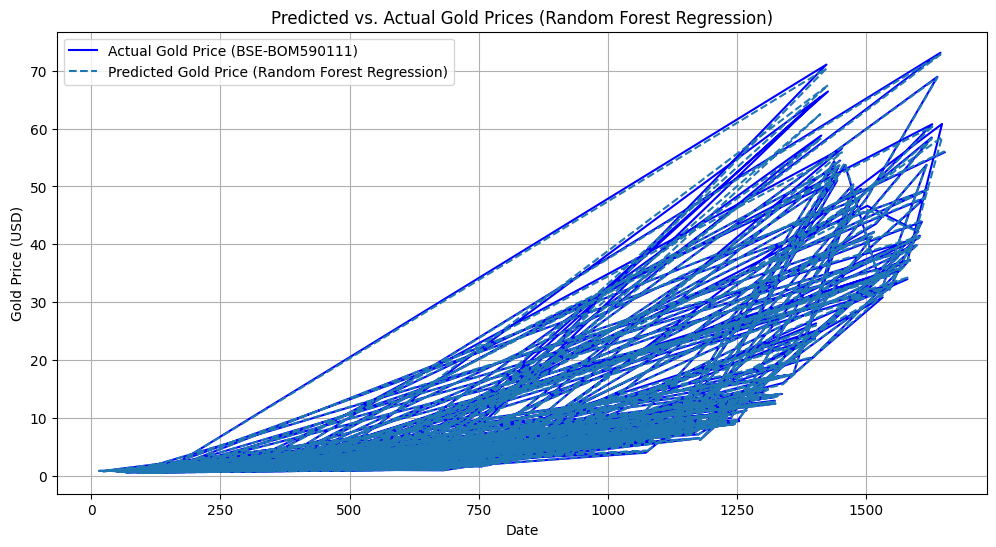

In [219]:
# Iterate through models and evaluate them
for model_name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    model_names.append(model_name)
    mse_scores.append(mse)
    r2_scores.append(r2)

    # Check if this model has better performance
    if mse < best_mse and r2 > best_r2:
        best_model_name = model_name
        best_mse = mse
        best_r2 = r2

    # Visualize the predicted vs. actual gold prices for each model
    plt.figure(figsize=(12, 6))
    plt.plot(X_test.index, y_test, label='Actual Gold Price (BSE-BOM590111)', color='blue')
    plt.plot(X_test.index, y_pred, label=f'Predicted Gold Price ({model_name})', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Gold Price (USD)')
    plt.title(f'Predicted vs. Actual Gold Prices ({model_name})')
    plt.legend()
    plt.grid(True)
    plt.show()

In [220]:
# Display the best model and its performance
print("Best Model:")
print(f"Model Name: {best_model_name}")
print(f"Mean Squared Error (MSE): {best_mse:.2f}")
print(f"R-squared (R2): {best_r2:.2f}")

Best Model:
Model Name: Linear Regression
Mean Squared Error (MSE): 0.00
R-squared (R2): 1.00


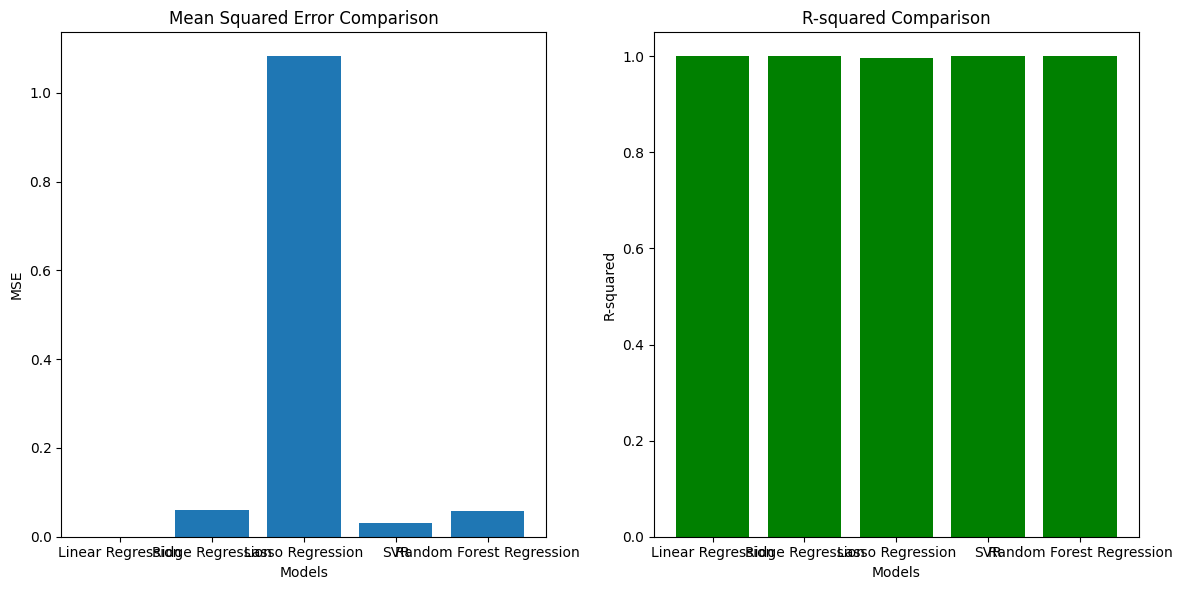

In [221]:
# Create bar charts to compare model performance
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(model_names, mse_scores)
plt.title('Mean Squared Error Comparison')
plt.xlabel('Models')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
plt.bar(model_names, r2_scores, color='green')
plt.title('R-squared Comparison')
plt.xlabel('Models')
plt.ylabel('R-squared')

plt.tight_layout()
plt.show()

In [223]:
# Display regression evaluation metrics
for i, model_name in enumerate(model_names):
    print(f"{model_name} Evaluation Metrics:")
    print(f"Mean Squared Error (MSE): {mse_scores[i]:.2f}")
    print(f"R-squared (R2): {r2_scores[i]:.2f}")
    print()

Linear Regression Evaluation Metrics:
Mean Squared Error (MSE): 0.00
R-squared (R2): 1.00

Ridge Regression Evaluation Metrics:
Mean Squared Error (MSE): 0.06
R-squared (R2): 1.00

Lasso Regression Evaluation Metrics:
Mean Squared Error (MSE): 1.08
R-squared (R2): 1.00

SVR Evaluation Metrics:
Mean Squared Error (MSE): 0.03
R-squared (R2): 1.00

Random Forest Regression Evaluation Metrics:
Mean Squared Error (MSE): 0.06
R-squared (R2): 1.00



In [231]:
# Use the best model for making predictions
best_model_tuple = models[model_names.index(best_model_name)]
best_model = best_model_tuple[1]  # Extract the model from the tuple
y_pred_best = best_model.predict(X_test_scaled)

# Create a DataFrame to hold the dates, actual prices, and predicted prices
results_df = pd.DataFrame({'Date': X_test.index, 'Actual Gold Price': y_test, 'Predicted Gold Price': y_pred_best})

# Display the DataFrame with actual and predicted prices
print("Actual vs. Predicted Gold Prices using the Best Model:")
print(results_df)

Actual vs. Predicted Gold Prices using the Best Model:
      Date  Actual Gold Price  Predicted Gold Price
1653  1653              55.90                 55.90
352    352               1.12                  1.12
1615  1615              48.00                 48.00
1105  1105               6.71                  6.71
1125  1125               7.70                  7.70
...    ...                ...                   ...
1414  1414              58.80                 58.80
534    534               2.14                  2.14
163    163               0.75                  0.75
692    692               1.41                  1.41
1450  1450              54.45                 54.45

[332 rows x 3 columns]
